- https://hyunlee103.tistory.com/36
- https://alpaca-gt.tistory.com/381

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.11-0ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [15]:
from os import path
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [16]:
file = '/content/drive/MyDrive/가은/[2022]/기타/gani_project/Sound/voice.m4a'

In [17]:
sound = AudioSegment.from_file(file)
print(type(sound))

<class 'pydub.audio_segment.AudioSegment'>


In [18]:
sig, sr = librosa.load(file, sr=None)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [19]:
y = np.array(sound.get_array_of_samples())

In [20]:
y.shape

(115712,)

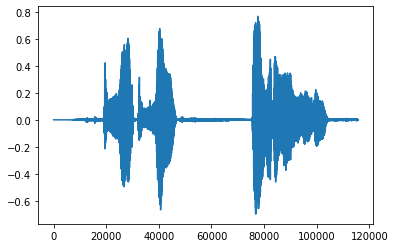

In [21]:
plt.plot(np.arange(0, len(sig)), sig)

✔ 단순 푸리에 변환 → Spectrum

Text(0.5, 1.0, 'Power spectrum')

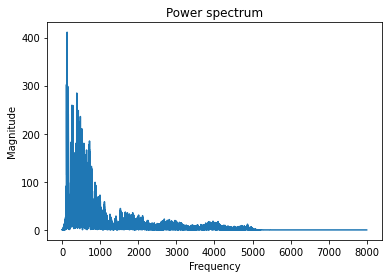

In [24]:
fft = np.fft.fft(sig)

# 복소공간 값 절댓갑 취해서, magnitude 구하기
magnitude = np.abs(fft) 

# Frequency 값 만들기
f = np.linspace(0,sr,len(magnitude))

# 푸리에 변환을 통과한 specturm은 대칭구조로 나와서 high frequency 부분 절반을 날려고 앞쪽 절반만 사용한다.
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure()
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

✔ STFT (Short Time Fourier Transform) -> Spectrogram

- Time 도메인의 파형을 Frequency 도메인으로 변형시키는 푸리에 변환
- 전체 파형을 대상으로 하면 제대로 된 주파수 분석을 할 수 없기 때문에, 짧은 시간 단위로 분리해서 각각의 구간에 대해 변환
  - win_length : FFT(Fast Fourier Transform의 약자, 빠르게 변환하는 방식)를 할 때 참조할 그래프의 길이
  - hop_length : 얼마만큼 시간 주기를 이동하면서 분석을 할 것인지 (칼라맵의 시간 주기)
  - n_fft : win_length보다 길 경우 모두 zero padding해서 처리하기 위함 (default는 win_length와 같음)

Text(0.5, 1.0, 'Spectrogram (dB)')

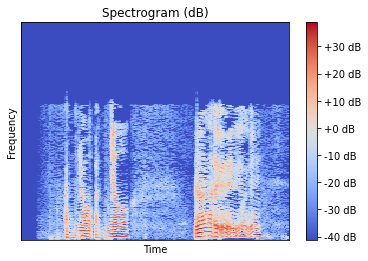

In [25]:
# STFT -> spectrogram
hop_length = 512  # 전체 frame 수
n_fft = 2048  # frame 하나당 sample 수

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sr
n_fft_duration = float(n_fft)/sr

# STFT
stft = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length)

# 복소공간 값 절댓값 취하기
magnitude = np.abs(stft)

# magnitude > Decibels 
log_spectrogram = librosa.amplitude_to_db(magnitude)

# display spectrogram
plt.figure()
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

✔ MFCC

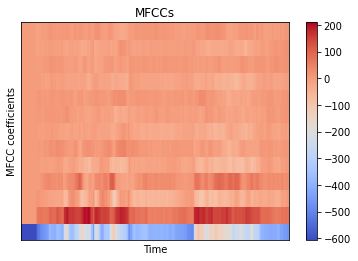

In [26]:
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(sig, sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure()
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()